---
title: "GIOZA Case Study: Production EDA"
format:
  html:
    toc: true
    toc-title: Contents
    toc-depth: 4
    code-fold: show
    self-contained: true
jupyter: python3
---

# Loading Packages and Data

In [18]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from plotnine import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [19]:
factory_prod = pd.read_csv('data/production.csv')

# Data Preparation

In [20]:
# check for missing values
print( factory_prod.isnull().sum() )

Confirmation        0
Ordre               0
Poste de travail    0
Centre de coûts     0
sku                 0
units               0
weight_kg           0
scrap               0
group               0
at                  0
dtype: int64


In [21]:
# return dtypes
print( factory_prod.dtypes )

Confirmation          int64
Ordre                 int64
Poste de travail      int64
Centre de coûts       int64
sku                   int64
units                 int64
weight_kg           float64
scrap                 int64
group                object
at                   object
dtype: object


In [22]:
# convert predictors into proper datatype
factory_prod['Confirmation'] = factory_prod['Confirmation'].astype(str)
factory_prod['Ordre'] = factory_prod['Ordre'].astype(str)
factory_prod['Poste de travail'] = factory_prod['Poste de travail'].astype(str)
factory_prod['Centre de coûts'] = factory_prod['Centre de coûts'].astype(str)
factory_prod['sku'] = factory_prod['sku'].astype(str)

factory_prod['at'] = pd.to_datetime(factory_prod['at'])
factory_prod = factory_prod.sort_values(by=['at'], ascending=True).reset_index(drop=True)

print( factory_prod.dtypes )

Confirmation                     object
Ordre                            object
Poste de travail                 object
Centre de coûts                  object
sku                              object
units                             int64
weight_kg                       float64
scrap                             int64
group                            object
at                  datetime64[ns, UTC]
dtype: object


# Data Visualizations

## Effect by group

In [23]:
factory_prod.groupby(['group']).agg(count=('units', 'size'), avg_units=('units', 'mean'), avg_weight_kg=('weight_kg', 'mean'), avg_scrap=('scrap', 'mean')).round(2)

,count,avg_units,avg_weight_kg,avg_scrap
group,,,,
4G100100,463,76805.62,90.34,1174.95
4G100110,84,63476.19,223.77,1869.05
4G100410,146,55332.10,191.66,0.00
4G100420,279,98369.18,135.20,376.34
4G110120,70,63500.00,90.08,214.29
4G110160,148,61317.57,176.66,858.11
4G120110,252,131384.92,165.20,1071.43
4G120120,257,117645.91,171.33,953.31
4G120300,252,121289.68,175.38,555.56


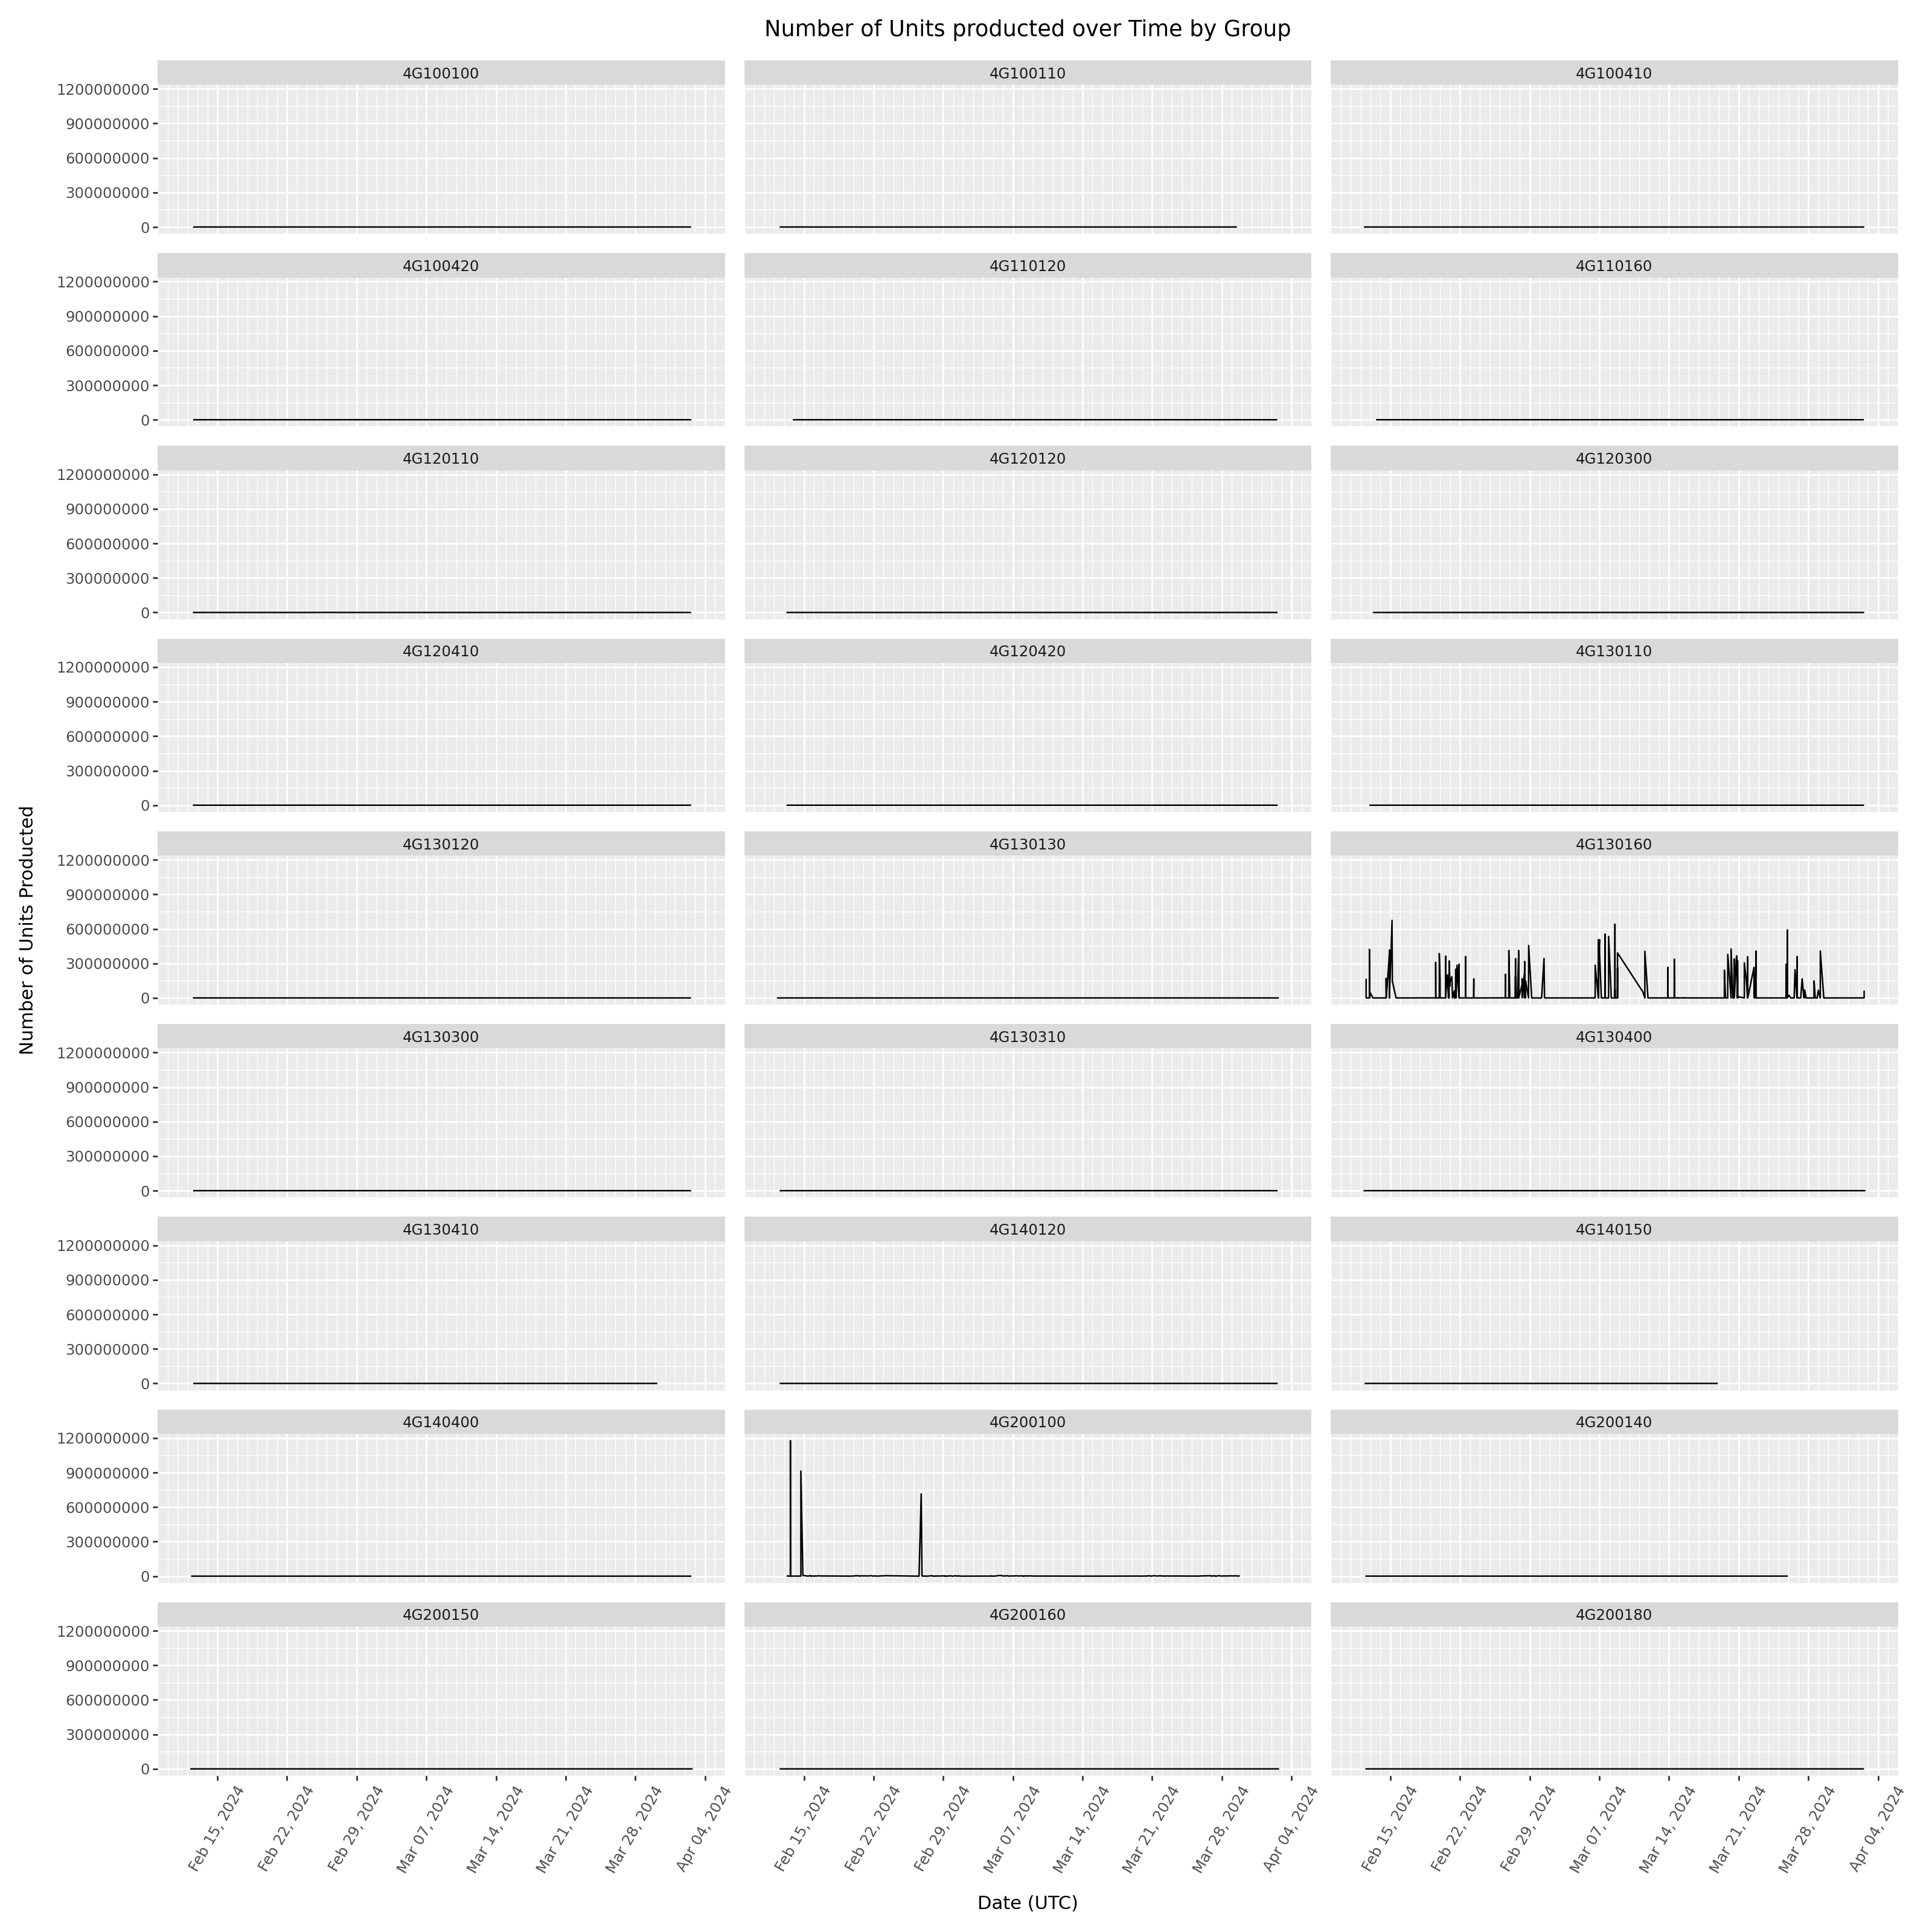

In [24]:
(
    ggplot(factory_prod, aes(x='at', y='units'))
    + geom_line()
    + facet_wrap("group", ncol=3)
    + scale_x_datetime(date_breaks='1 week', date_minor_breaks='1 day', date_labels="%b %d, %Y")
    + theme(figure_size=(16, 16), axis_text_x=element_text(angle=60))
    + labs(x = 'Date (UTC)', y = 'Number of Units Producted', title = 'Number of Units producted over Time by Group')
)

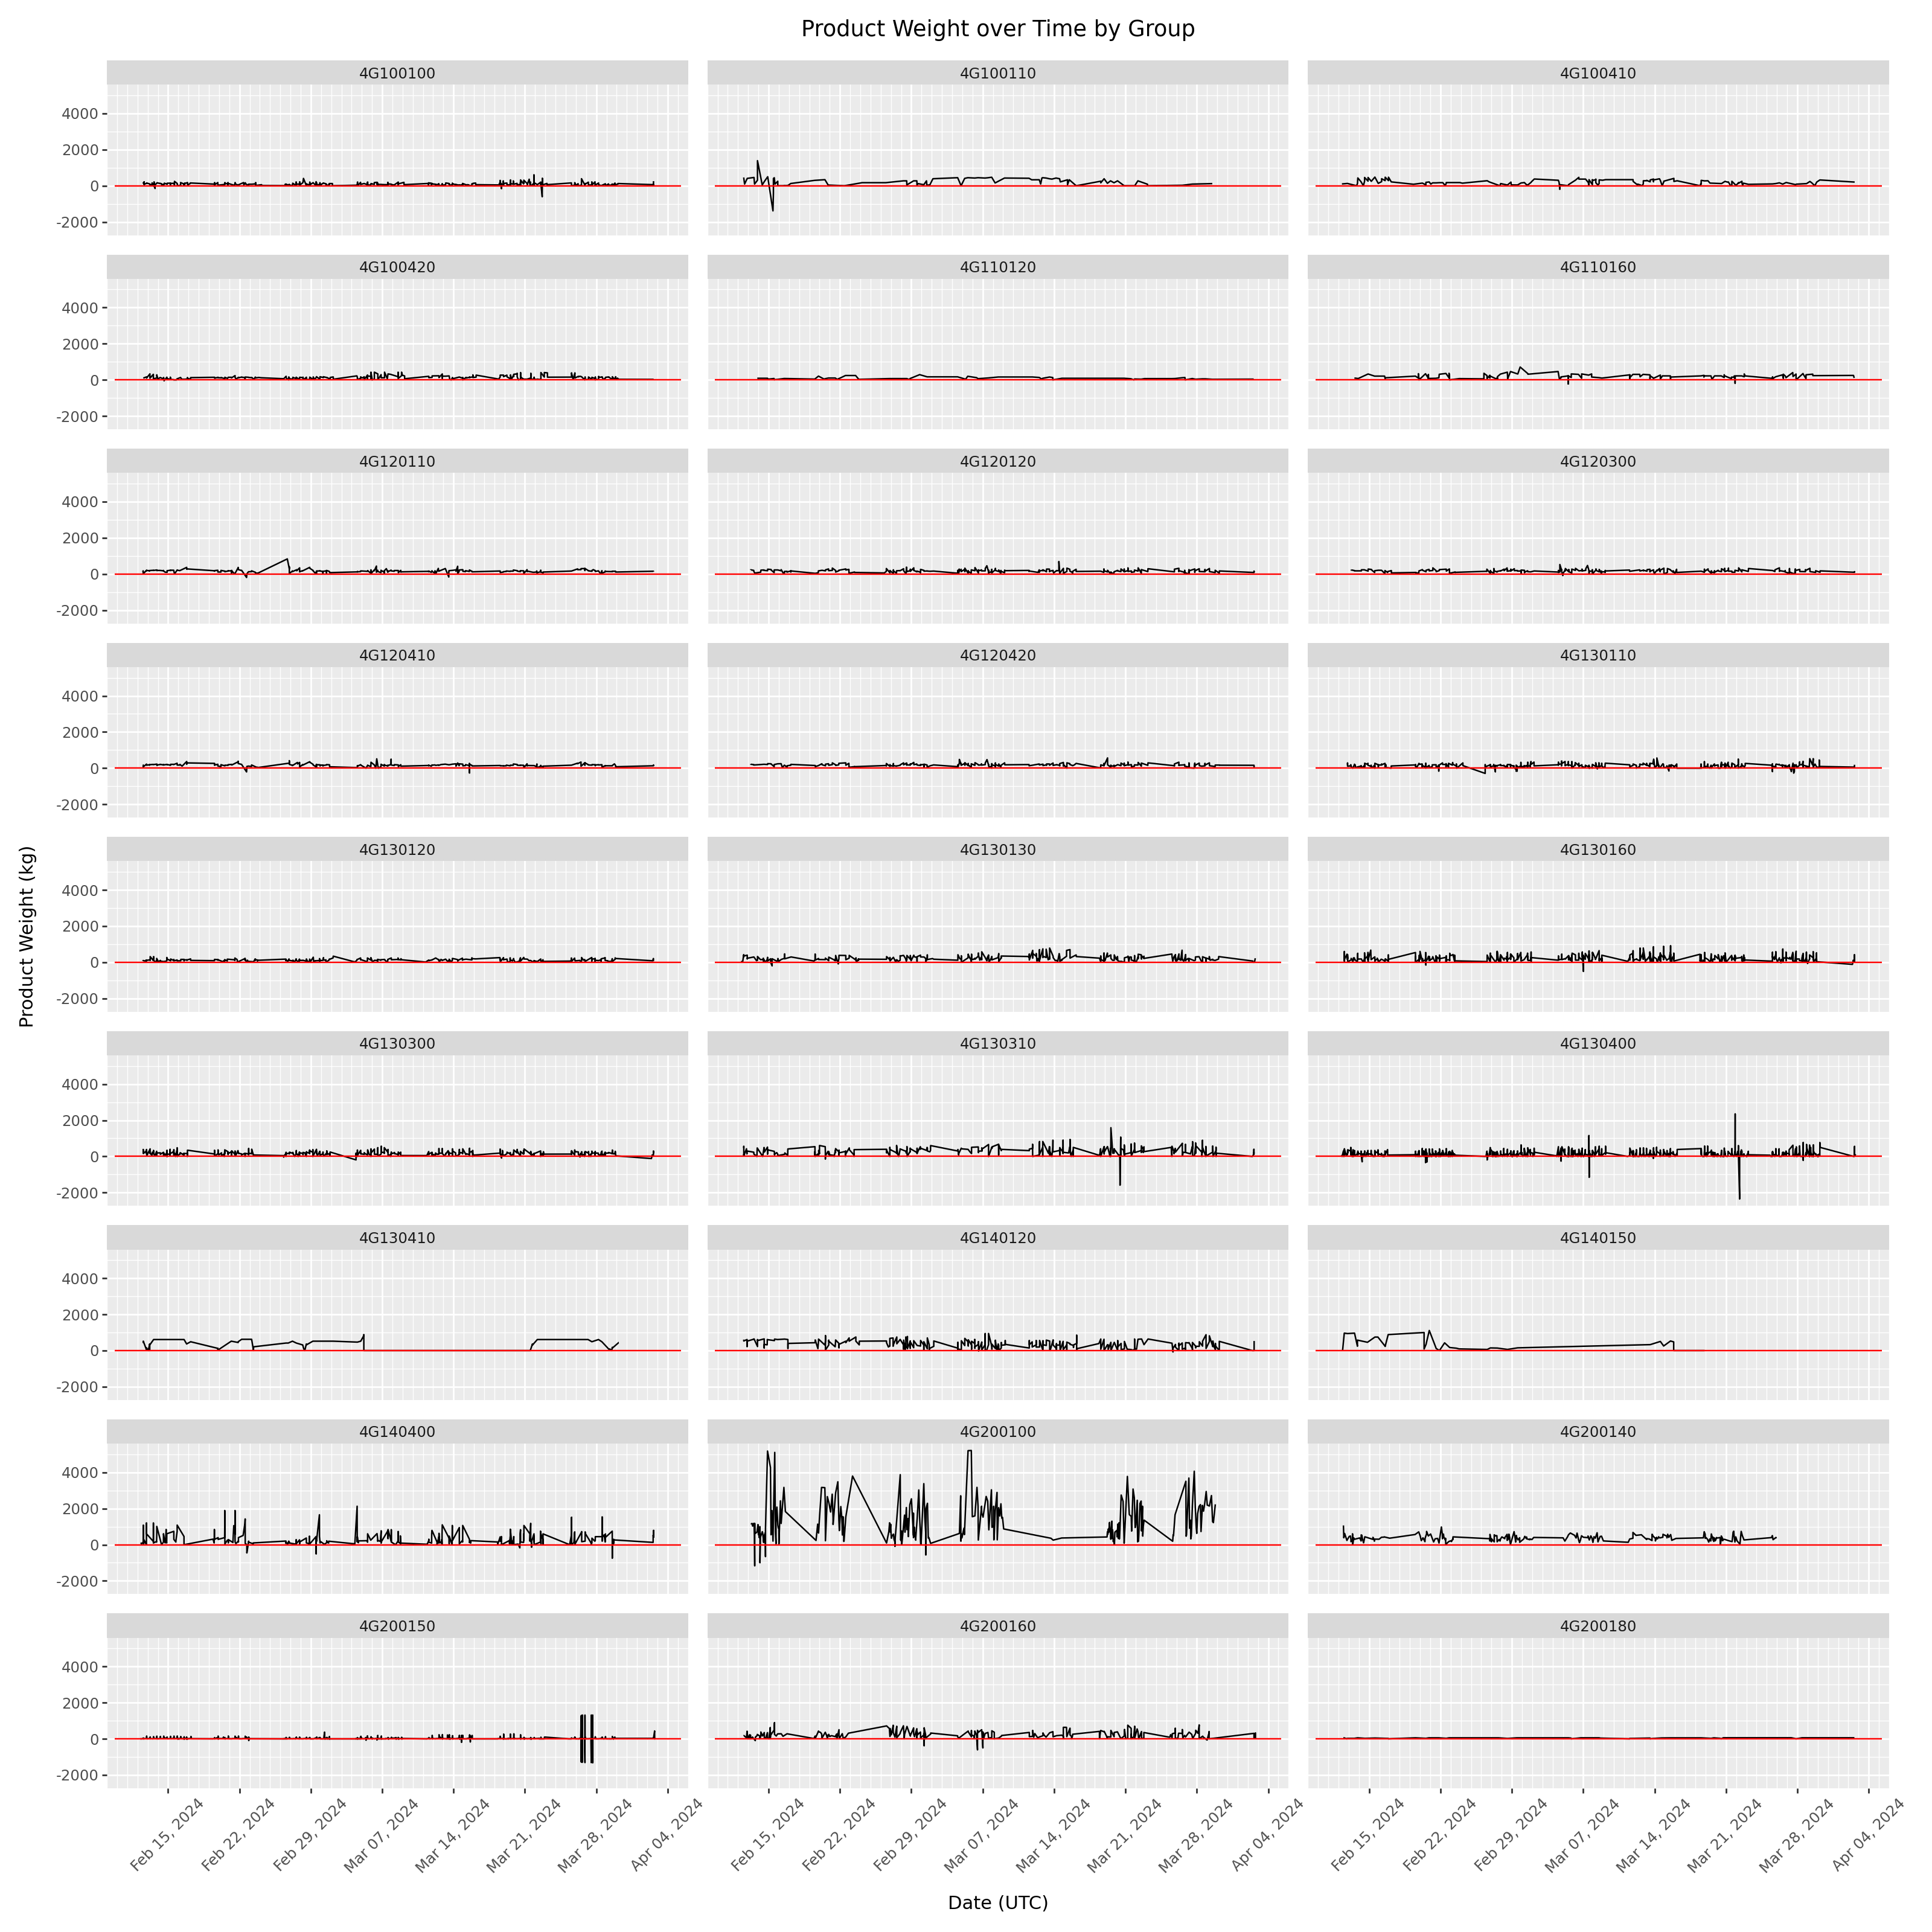

In [25]:
(
    ggplot(factory_prod, aes(x='at', y='weight_kg'))
    + geom_line()
    + geom_hline(yintercept=0, color='red')
    + facet_wrap("group", ncol=3)
    + scale_x_datetime(date_breaks='1 week', date_minor_breaks='1 day', date_labels="%b %d, %Y")
    + theme(figure_size=(16, 16), axis_text_x=element_text(angle=45))
    + labs(x = 'Date (UTC)', y = 'Product Weight (kg)', title = 'Product Weight over Time by Group')
)

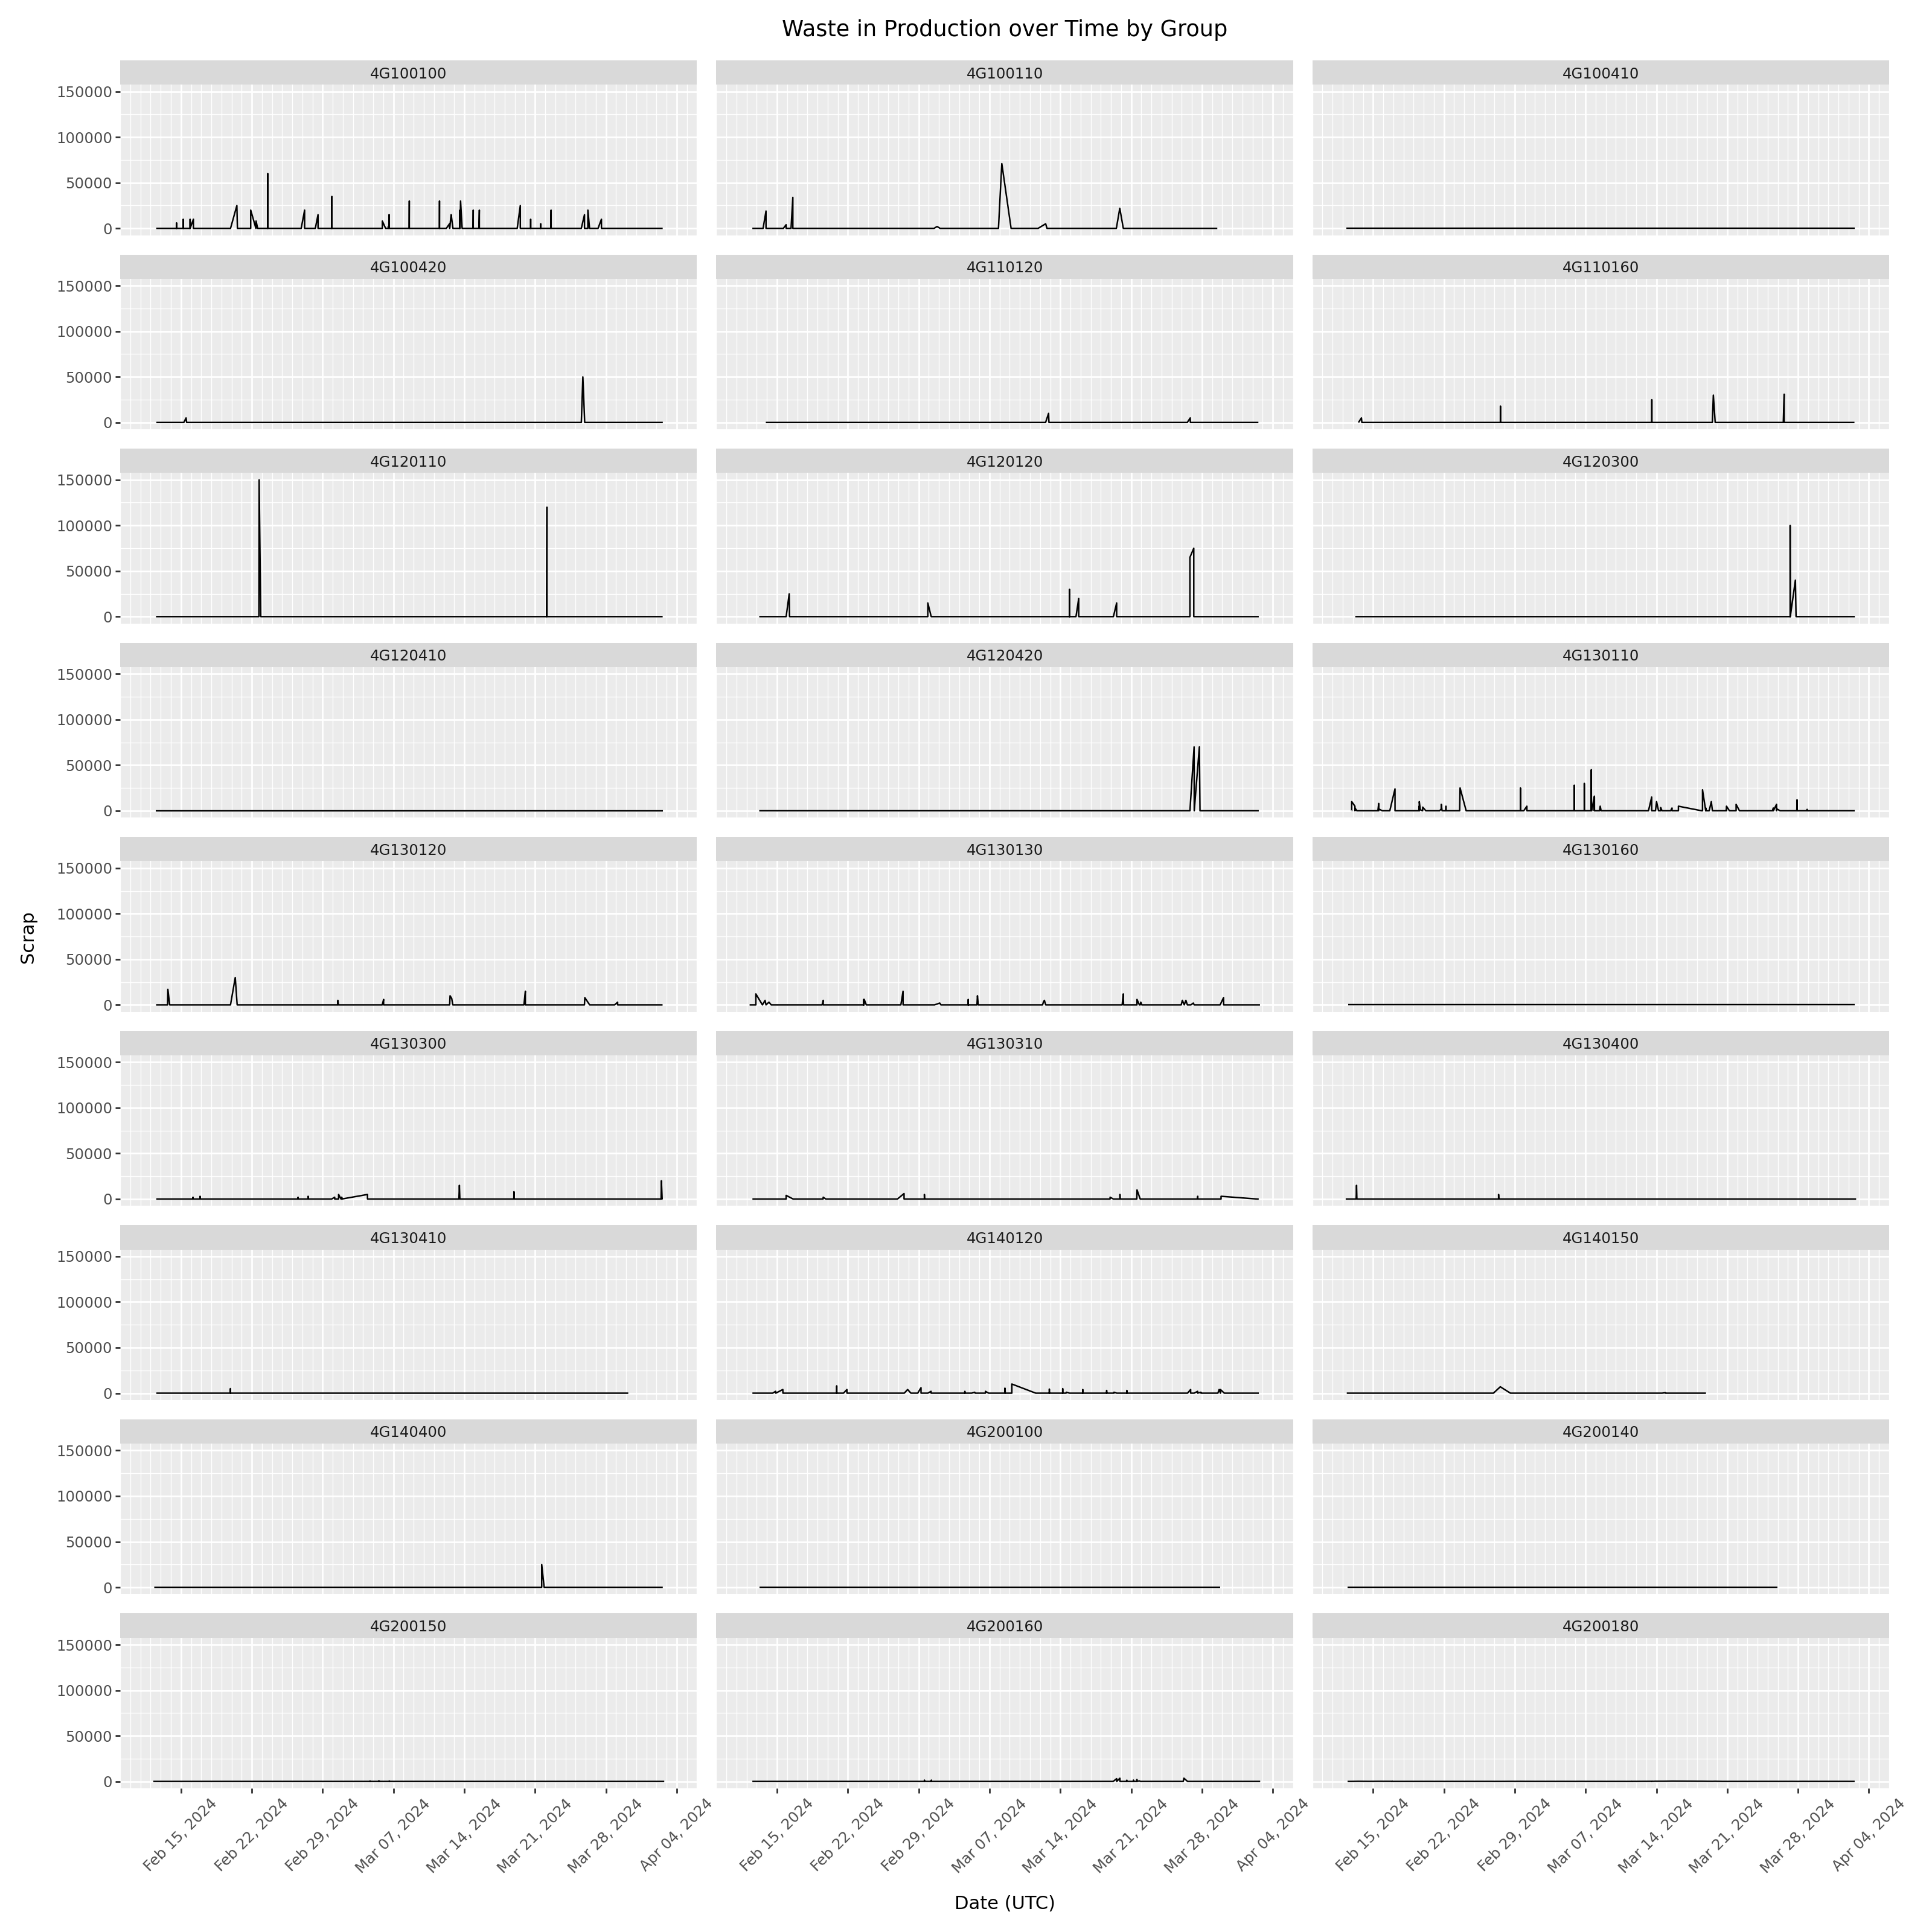

In [26]:
(
    ggplot(factory_prod, aes(x='at', y='scrap'))
    + geom_line()
    + facet_wrap("group", ncol=3)
    + scale_x_datetime(date_breaks='1 week', date_minor_breaks='1 day', date_labels="%b %d, %Y")
    + theme(figure_size=(16, 16), axis_text_x=element_text(angle=45))
    + labs(x = 'Date (UTC)', y = 'Scrap', title = 'Waste in Production over Time by Group')
)

In [27]:
for label, data in factory_prod.groupby(['Centre de coûts']):
    print(label, data['group'].nunique(), sorted(set(data['group'])))

('208006',) 9 ['4G100100', '4G100110', '4G110120', '4G110160', '4G130110', '4G130120', '4G130130', '4G140120', '4G140150']
('208007',) 5 ['4G100410', '4G100420', '4G130400', '4G130410', '4G140400']
('208009',) 3 ['4G130160', '4G200100', '4G200140']
('208011',) 6 ['4G100100', '4G120110', '4G120120', '4G120300', '4G120410', '4G120420']
('208014',) 2 ['4G130300', '4G130310']
('208026',) 3 ['4G200150', '4G200160', '4G200180']


## Effect by sku

In [28]:
factory_prod.groupby(['sku']).agg(count=('units', 'size'), avg_units=('units', 'mean'), avg_weight_kg=('weight_kg', 'mean'), avg_scrap=('scrap', 'mean')).round(2)

,count,avg_units,avg_weight_kg,avg_scrap
sku,,,,
1013270,2,5.100000e+04,295.80,0.00
1013500,5,2.320000e+04,101.87,1200.00
1013986,17,8.043759e+04,163.78,294.12
1016772,31,1.043548e+05,126.27,322.58
1018715,5,3.200000e+04,408.54,200.00
1025956,9,3.611111e+04,74.19,222.22
1039910,9,1.411222e+05,258.82,0.00
1042140,16,1.004022e+05,154.48,312.50
1060102,31,5.415126e+04,90.26,278.52


## Effect by Centre de coûts and Poste de travail

In [29]:
factory_prod.groupby(['Centre de coûts']).agg(count=('units', 'size'), avg_units=('units', 'mean'), avg_weight_kg=('weight_kg', 'mean'), avg_scrap=('scrap', 'mean')).round(2)

,count,avg_units,avg_weight_kg,avg_scrap
Centre de coûts,,,,
208006,2173,54346.07,170.52,736.08
208007,2104,53465.69,190.87,73.67
208009,1145,26554299.39,486.68,0.00
208011,1255,125074.10,171.61,649.40
208014,887,70325.84,217.77,130.78
208026,1818,11162.46,53.93,13.32


In [30]:
for label, data in factory_prod.groupby(['Centre de coûts']):
    print(label, data['Poste de travail'].nunique(), sorted(set(data['Poste de travail'])))

('208006',) 32 ['40102', '40103', '40104', '40107', '40108', '40109', '40118', '40119', '40120', '40121', '40122', '40123', '40124', '40125', '40129', '40131', '40133', '40134', '40141', '40142', '40143', '40144', '40145', '40146', '40147', '40148', '40149', '40150', '40155', '40156', '40157', '40158']
('208007',) 33 ['40401', '40402', '40404', '40407', '40408', '40409', '40412', '40413', '40416', '40417', '40418', '40419', '40420', '40421', '40424', '40426', '40428', '40429', '40430', '40431', '40432', '40434', '40436', '40437', '40438', '40439', '40440', '40441', '40442', '40443', '40445', '40446', '40448']
('208009',) 3 ['40834', '40904', '40940']
('208011',) 14 ['40112', '40113', '40116', '40130', '40132', '40135', '40330', '40332', '40336', '40403', '40422', '40423', '40427', '40433']
('208014',) 11 ['40323', '40325', '40326', '40328', '40329', '40334', '40335', '40337', '40338', '40339', '40340']
('208026',) 14 ['40201', '40202', '40203', '40204', '40205', '40206', '40207', '4020

In [31]:
factory_prod.groupby(['Centre de coûts', 'Poste de travail']).agg(count=('units', 'size'), avg_units=('units', 'mean'), avg_weight_kg=('weight_kg', 'mean'), avg_scrap=('scrap', 'mean')).round(2)

count    avg_units  avg_weight_kg  avg_scrap
Centre de coûts Poste de travail                                              
208006          40102               143     42510.49         129.82     681.85
                40103                23     56391.30          71.22     782.61
                40104                70     63500.00          90.08     214.29
                40107                74     29972.97         359.36     439.19
                40108                60     30133.33         215.63     116.67
                40109                91     24846.15         354.43     324.18
                40118                20     75250.00          48.04    1500.00
                40119                43     65813.95          99.33    1116.28
                40120                91     52736.26         125.21    1302.20
                40121               127     60811.02          78.61    1496.06
                40122                91     87087.91          79.91    1208.79
                40123                40     87825.00         103.72       0.00
                40124               105     97428.57         121.17    1390.48
                40125                62     60241.94          87.99     774.19
                40129                40     53375.00         184.54    2150.00
                40131               181     37436.46         149.50     917.13
                40133                 3     68333.33          68.33       0.00
                40134                44     72659.09         259.44    1613.64
                40141                51     32803.92         194.86     274.51
                40142                 5     18200.00         103.09       0.00
                40143               157     37050.96         208.87     401.27
                40144                84     45059.52         251.60     500.00
                40145                82     57719.51         119.42     378.05
                40146                96     54895.83         112.38     812.50
                40147                72     30513.89         352.37     333.33
                40148                36     19361.11         372.88     208.33
                40149                14     37642.86         305.46       0.00
                40150                76     59671.05         190.72      65.79
                40155                50    104440.00         151.91       0.00
                40156                70     90371.43         117.15       0.00
                40157                65     63153.85         154.92    1876.92
                40158                 7     62142.86         225.79       0.00
208007          40401                16     77187.50         107.69       0.00
                40402                 5    122000.00          51.24       0.00
                40404               114     45122.81          70.96     175.44
                40407                47     84319.57         166.95       0.00
                40408                93     82580.65         132.99       0.00
                40409                57     38719.30         434.57       0.00
                40412               116     71612.07          81.36       0.00
                40413                61     18229.80         158.60       0.00
                40416               126     52515.87         126.53       0.00
                40417               117     40249.59         153.87       0.00
                40418               101     60968.32          88.52       0.00
                40419                31    100967.74          27.13       0.00
                40420                40     65825.00         113.73       0.00
                40421                63     76238.10         122.73      79.37
                40424               107    119056.07         133.77     934.58
                40426               122     49877.05         141.15       0.00
                40428                96     49193.44         223.11       0.00
     

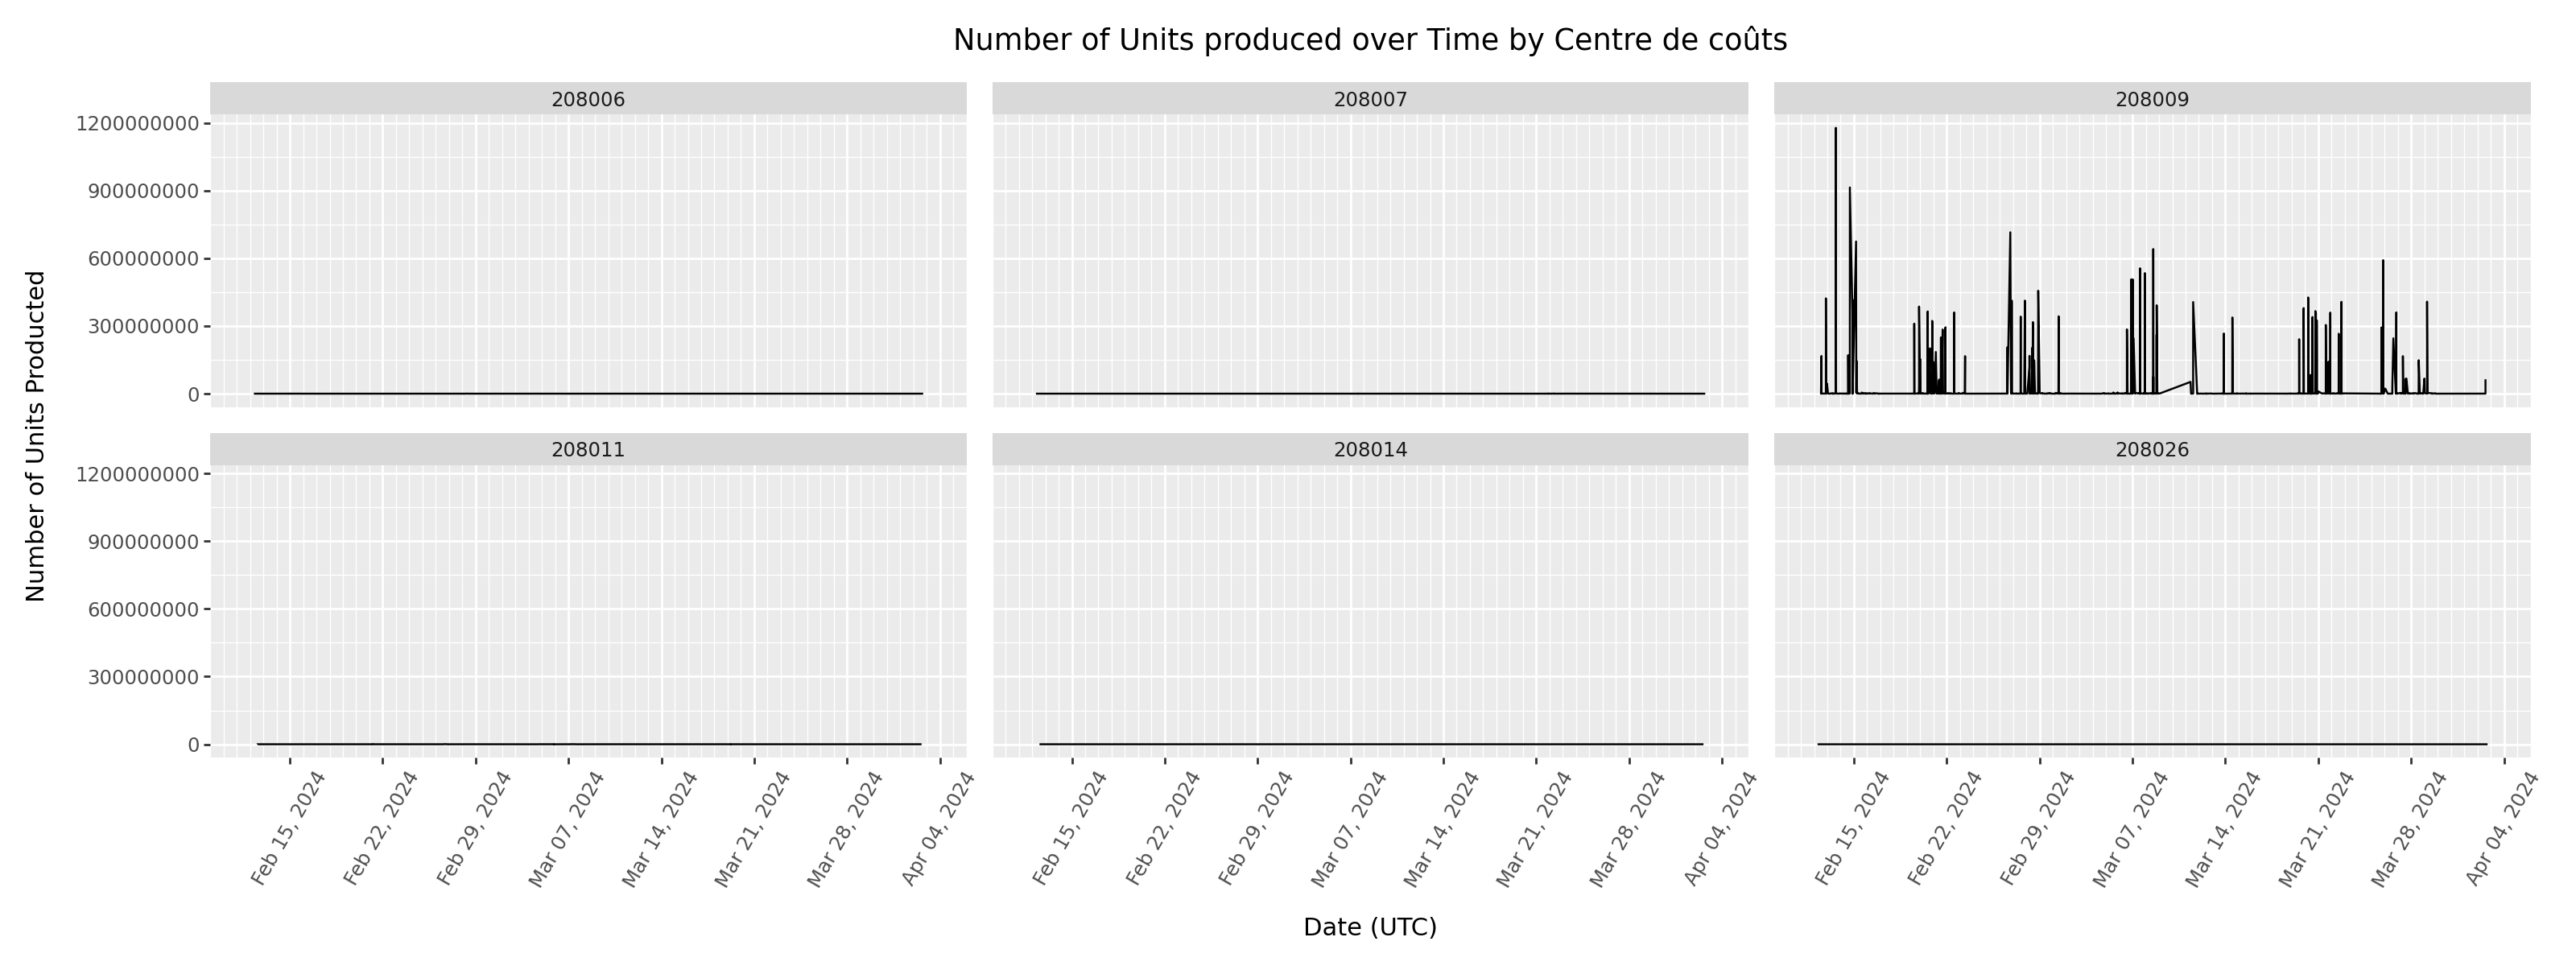

In [32]:
(
    ggplot(factory_prod, aes(x='at', y='units'))
    + geom_line()
    + facet_wrap("Centre de coûts", ncol=3)
    + scale_x_datetime(date_breaks='1 week', date_minor_breaks='1 day', date_labels="%b %d, %Y")
    + theme(figure_size=(16, 6), axis_text_x=element_text(angle=60))
    + labs(x = 'Date (UTC)', y = 'Number of Units Producted', title = 'Number of Units produced over Time by Centre de coûts')
)

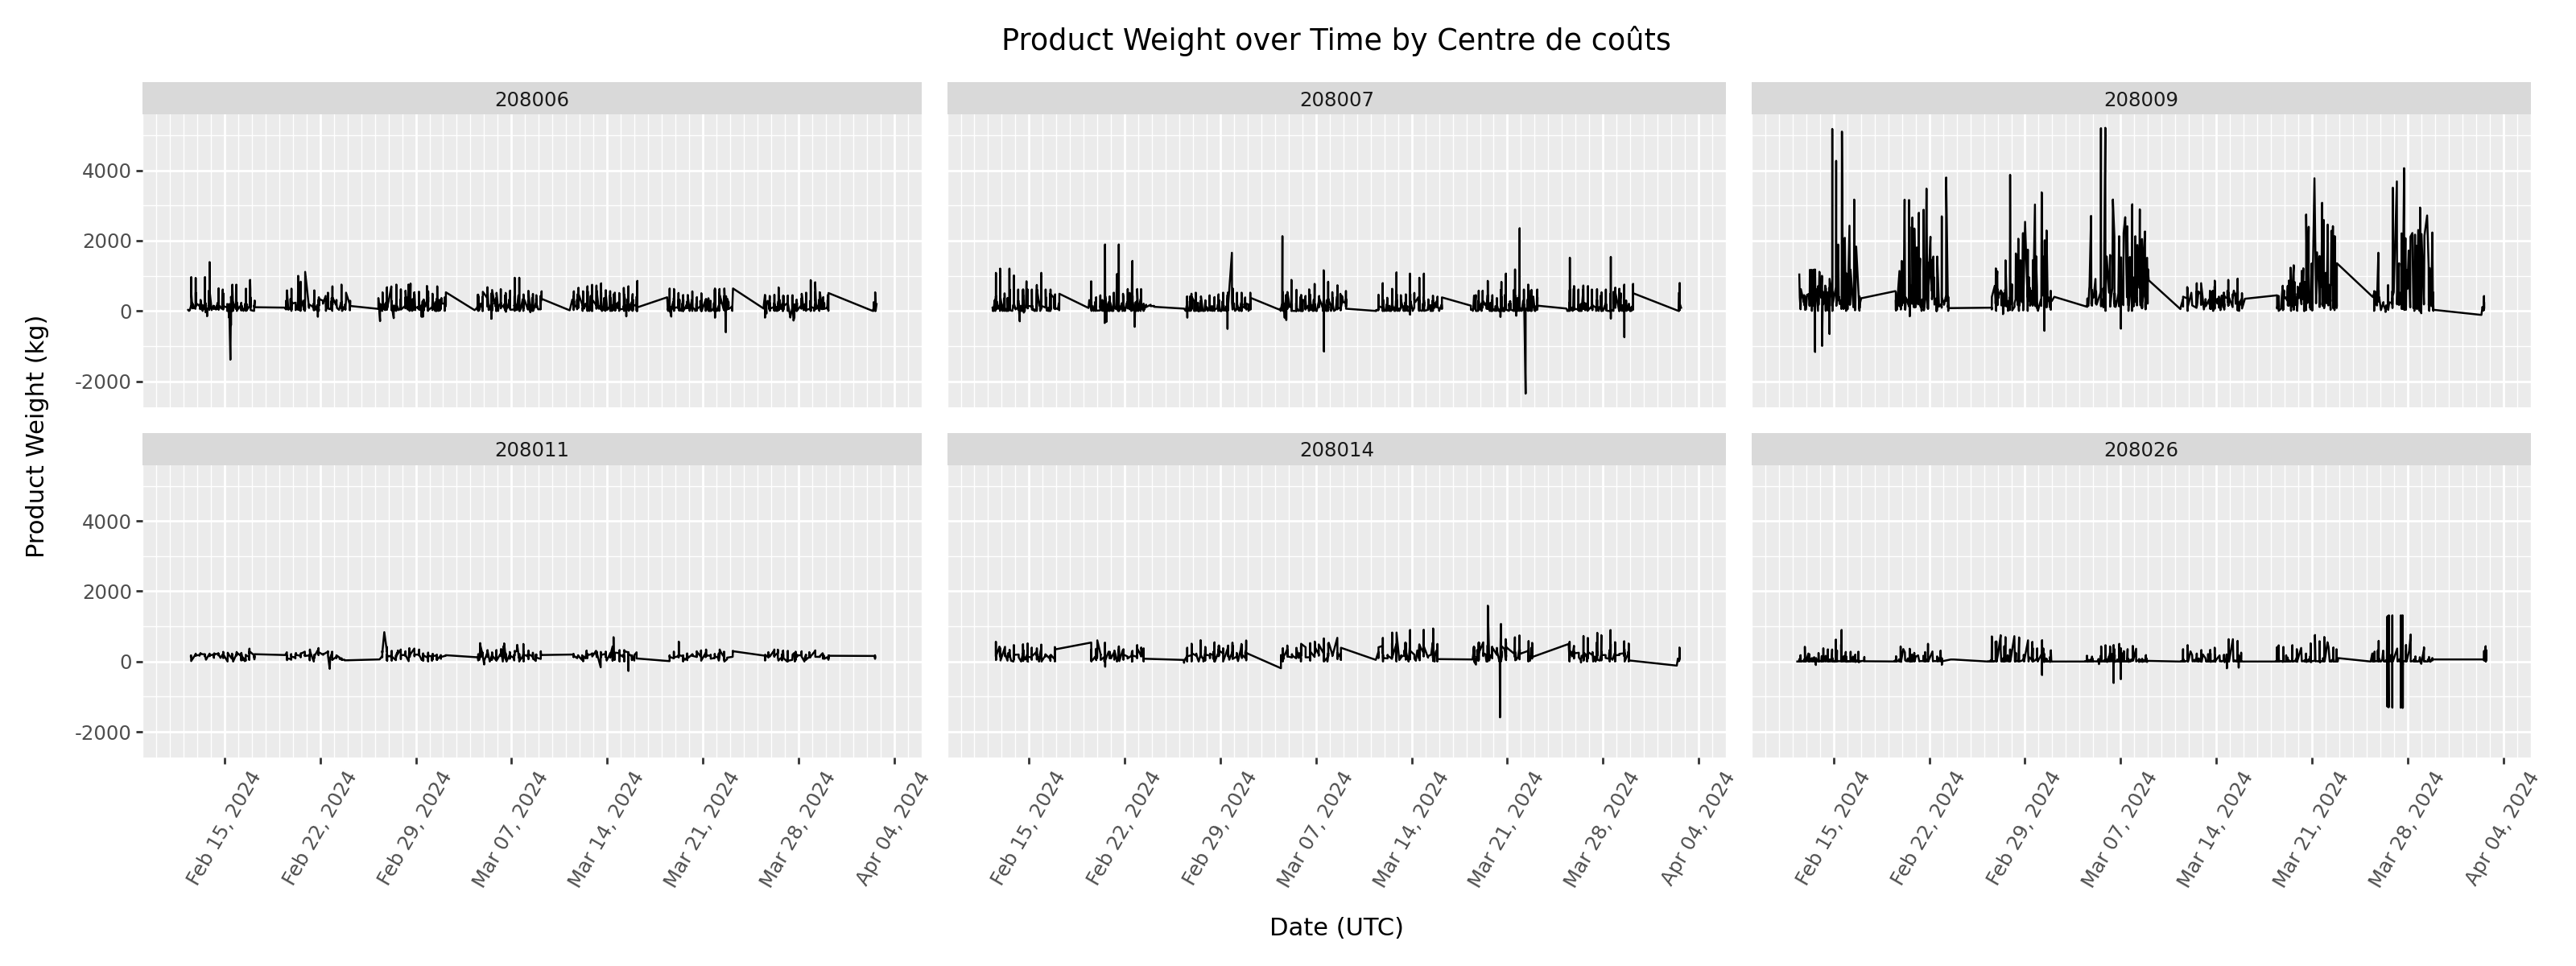

In [33]:
(
    ggplot(factory_prod, aes(x='at', y='weight_kg'))
    + geom_line()
    + facet_wrap("Centre de coûts", ncol=3)
    + scale_x_datetime(date_breaks='1 week', date_minor_breaks='1 day', date_labels="%b %d, %Y")
    + theme(figure_size=(16, 6), axis_text_x=element_text(angle=60))
    + labs(x = 'Date (UTC)', y = 'Product Weight (kg)', title = 'Product Weight over Time by Centre de coûts')
)

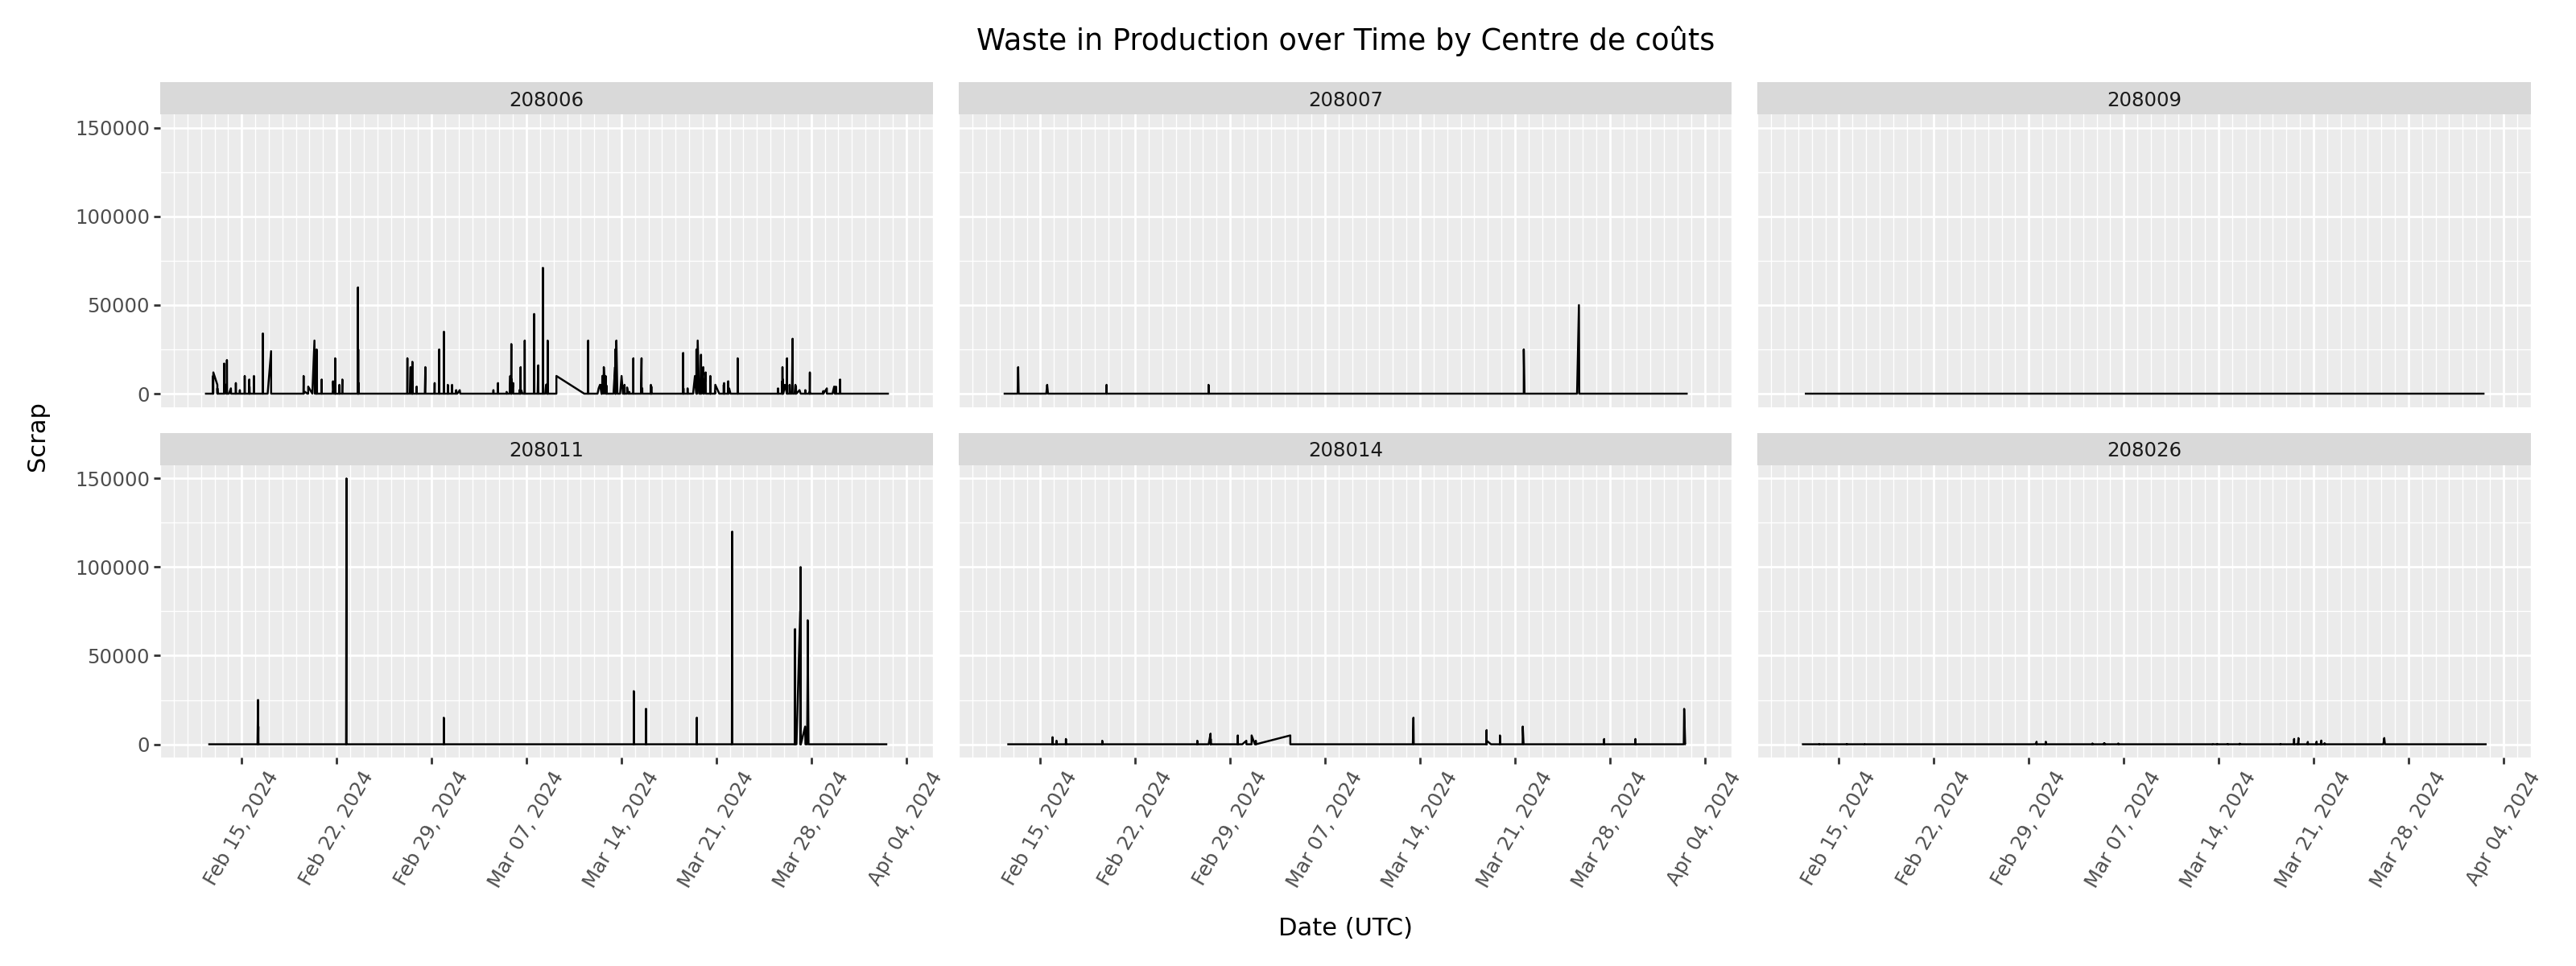

In [34]:
(
    ggplot(factory_prod, aes(x='at', y='scrap'))
    + geom_line()
    + facet_wrap("Centre de coûts", ncol=3)
    + scale_x_datetime(date_breaks='1 week', date_minor_breaks='1 day', date_labels="%b %d, %Y")
    + theme(figure_size=(16, 6), axis_text_x=element_text(angle=60))
    + labs(x = 'Date (UTC)', y = 'Scrap', title = 'Waste in Production over Time by Centre de coûts')
)